In [41]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('PVS Historical Data.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

df1=data.reset_index()['Price']

In [43]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [45]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [46]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [48]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 9s 136ms/step - loss: 0.0358 - val_loss: 0.0547
Epoch 2/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0088 - val_loss: 0.0150
Epoch 3/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0050 - val_loss: 0.0101
Epoch 4/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 5/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0035 - val_loss: 0.0094
Epoch 6/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0033 - val_loss: 0.0093
Epoch 7/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0031 - val_loss: 0.0088
Epoch 8/100
15/15 [==============================] - 0s 34ms/step - loss: 0.0030 - val_loss: 0.0085
Epoch 9/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0030 - val_loss: 0.0081
Epoch 10/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0029 - val_loss: 0.007

15/15 [==============================] - 1s 37ms/step - loss: 5.4525e-04 - val_loss: 0.0017
Epoch 81/100
15/15 [==============================] - 1s 35ms/step - loss: 6.1262e-04 - val_loss: 0.0024
Epoch 82/100
15/15 [==============================] - 1s 35ms/step - loss: 5.7489e-04 - val_loss: 0.0016
Epoch 83/100
15/15 [==============================] - 1s 36ms/step - loss: 6.1869e-04 - val_loss: 0.0024
Epoch 84/100
15/15 [==============================] - 1s 39ms/step - loss: 5.5177e-04 - val_loss: 0.0018
Epoch 85/100
15/15 [==============================] - 1s 37ms/step - loss: 6.0986e-04 - val_loss: 0.0020
Epoch 86/100
15/15 [==============================] - 1s 37ms/step - loss: 5.3977e-04 - val_loss: 0.0020
Epoch 87/100
15/15 [==============================] - 1s 35ms/step - loss: 5.3528e-04 - val_loss: 0.0016
Epoch 88/100
15/15 [==============================] - 1s 35ms/step - loss: 5.4583e-04 - val_loss: 0.0016
Epoch 89/100
15/15 [==============================] - 1s 36ms/step -

In [50]:
# 10. Dự báo dữ liệu test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape(1, -1))
y_test_new = scaler.inverse_transform(np.array([ytest], dtype=np.float32))

4/4 [==============================] - 0s 11ms/step


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
test_score_mape = mean_absolute_percentage_error(y_test_new, y_pred_new) * 100
test_score_mda = calculate_mda(y_test_new, y_pred_new)

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')

RMSE trên tập test là: 1127.1506
MAPE trên tập test là: 3.2570254057645798 %
MDA trên tập test là: 41.32231404958678 %


In [52]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.7963976]
79
1 day input [0.56997665 0.57341025 0.58371103 0.61804697 0.60774619 0.59744541
 0.60431259 0.61117978 0.63521494 0.62148057 0.59744541 0.58714462
 0.54594149 0.58714462 0.55624227 0.56310946 0.51503914 0.52533993
 0.5390743  0.5425079  0.55624227 0.55624227 0.56310946 0.55967587
 0.55967587 0.56310946 0.59744541 0.59401181 0.59744541 0.57341025
 0.58027743 0.57341025 0.58714462 0.58714462 0.59744541 0.56997665
 0.56997665 0.58027743 0.56997665 0.55967587 0.54594149 0.54937509
 0.54594149 0.55967587 0.54937509 0.55967587 0.55280868 0.55280868
 0.57341025 0.58027743 0.58371103 0.58714462 0.59401181 0.57341025
 0.60774619 0.59744541 0.60431259 0.6626837  0.67641807 0.70388683
 0.70388683 0.73478918 0.73135558 0.71762121 0.74165637 0.75539074
 0.74165637 0.75539074 0.75882434 0.75539074 0.75539074 0.74165637
 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.79639763]
1 day output [[0.78898627]]
2 day input [0.57341025 0.58371103 0.61804697 0.60774619 0.59744541 0.604

12 day output [[0.6203552]]
13 day input [0.54594149 0.58714462 0.55624227 0.56310946 0.51503914 0.52533993
 0.5390743  0.5425079  0.55624227 0.55624227 0.56310946 0.55967587
 0.55967587 0.56310946 0.59744541 0.59401181 0.59744541 0.57341025
 0.58027743 0.57341025 0.58714462 0.58714462 0.59744541 0.56997665
 0.56997665 0.58027743 0.56997665 0.55967587 0.54594149 0.54937509
 0.54594149 0.55967587 0.54937509 0.55967587 0.55280868 0.55280868
 0.57341025 0.58027743 0.58371103 0.58714462 0.59401181 0.57341025
 0.60774619 0.59744541 0.60431259 0.6626837  0.67641807 0.70388683
 0.70388683 0.73478918 0.73135558 0.71762121 0.74165637 0.75539074
 0.74165637 0.75539074 0.75882434 0.75539074 0.75539074 0.74165637
 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.79639763
 0.78898627 0.76750779 0.75019735 0.73260939 0.71402484 0.69581527
 0.67877561 0.66328138 0.64958787 0.63784879 0.62811464 0.62035519]
13 day output [[0.61448103]]
14 day input [0.58714462 0.55624227 0.56310946 0.51503914 

21 day output [[0.61612797]]
22 day input [0.55624227 0.56310946 0.55967587 0.55967587 0.56310946 0.59744541
 0.59401181 0.59744541 0.57341025 0.58027743 0.57341025 0.58714462
 0.58714462 0.59744541 0.56997665 0.56997665 0.58027743 0.56997665
 0.55967587 0.54594149 0.54937509 0.54594149 0.55967587 0.54937509
 0.55967587 0.55280868 0.55280868 0.57341025 0.58027743 0.58371103
 0.58714462 0.59401181 0.57341025 0.60774619 0.59744541 0.60431259
 0.6626837  0.67641807 0.70388683 0.70388683 0.73478918 0.73135558
 0.71762121 0.74165637 0.75539074 0.74165637 0.75539074 0.75882434
 0.75539074 0.75539074 0.74165637 0.74165637 0.75195715 0.75195715
 0.73822277 0.82406263 0.79639763 0.78898627 0.76750779 0.75019735
 0.73260939 0.71402484 0.69581527 0.67877561 0.66328138 0.64958787
 0.63784879 0.62811464 0.62035519 0.61448103 0.61036009 0.60783237
 0.60672224 0.60684633 0.60802227 0.61007279 0.61282808 0.61612797]
22 day output [[0.61982137]]
23 day input [0.56310946 0.55967587 0.55967587 0.56310946

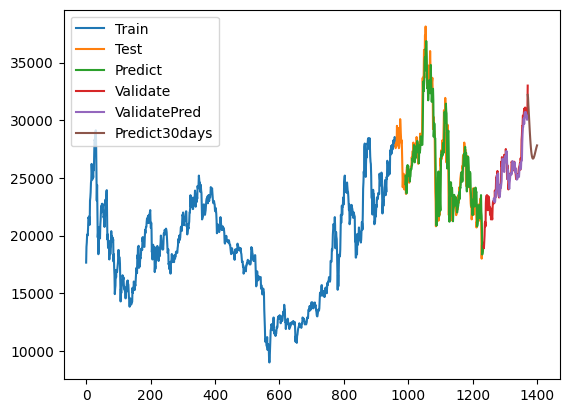

In [53]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+31, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_pred_val))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()